Solving the system of differential equations:
$$
\frac{d^2\mathbf{x}}{dt^2}=k\begin{bmatrix}
2/m_1 & 1/m_1\\
-1/m_2 & -1/m_2\\
\end{bmatrix}\mathbf{x}
$$
gives
$$
\mathbf{x} = exp(t\sqrt{\mathbf{A}})\\
\mathbf{x} = cosh(t\sqrt{\mathbf{A}})\\
\mathbf{x} = sinh(t\sqrt{\mathbf{A}})
$$
where:
$$
\mathbf{A} = k\begin{bmatrix}
-2/m_1 & 1/m_1\\
-1/m_2 & -1/m_2\\
\end{bmatrix}
$$

In [35]:
using Plots, FFTW

m₁ = 10
m₂ = 1
k = 1

A = k * [-1/m₁ 1/m₁; 1/m₁ (-1/m₂ - 1/m₁)]

t = range(0, 50, length=500)

x₁_init = -1
x₂_init = -1

initial = [x₁_init;x₂_init]

x = [exp(i * sqrt(A)) * initial for i ∈ t]

x₁ = [real(i[1]) for i ∈ x]
x₂ = [real(i[2]) for i ∈ x]

500-element Vector{Float64}:
 -1.0
 -0.9949845583090886
 -0.9799935726358809
 -0.9551924455250341
 -0.9208548025583582
 -0.877359448277863
 -0.8251861520281208
 -0.7649103106321744
 -0.6971965473188574
 -0.622791318161503
  ⋮
  0.059205665557710854
  0.1558296697164818
  0.25139504790559447
  0.3448637232995288
  0.4352203269989025
  0.5214834795128231
  0.6027166944252687
  0.6780387828728522
  0.7466336430184257

The following code plots the solution to the differential equations

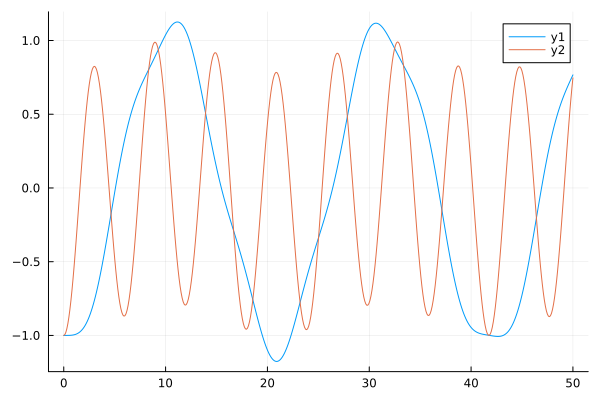

In [36]:
plot(t, [x₁, x₂])

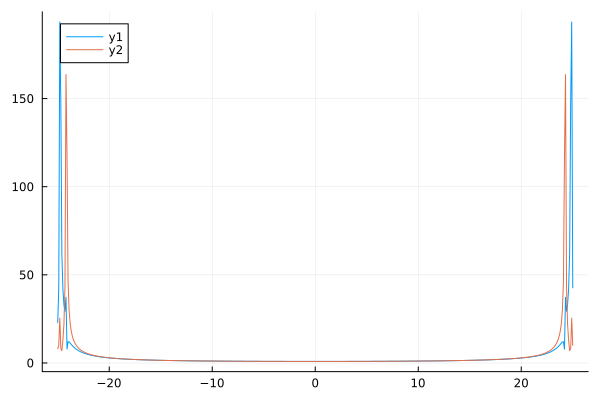

In [42]:
fft_x1 = fft(x₁)
fft_x2 = fft(x₂)

mag_fft_x1 = [abs(i) for i in fft_x1]
mag_fft_x2 = [abs(i) for i in fft_x2]

arg_fft_x1 = [angle(i) for i in fft_x1]
arg_fft_x2 = [angle(i) for i in fft_x2]

re_fft_x1 = [real(i) for i in fft_x1]
re_fft_x2 = [real(i) for i in fft_x2]

im_fft_x1 = [imag(i) for i in fft_x1]
im_fft_x2 = [imag(i) for i in fft_x2]

plot([i-25 for i in t], [mag_fft_x1, mag_fft_x2])